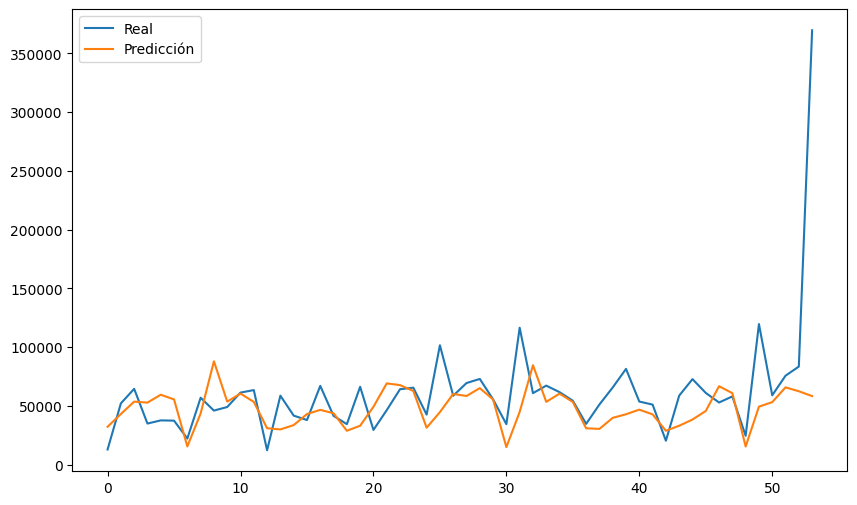

In [2]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

# Leer el archivo CSV
df_to_train = pd.read_csv("../data/dataset_de_entrenamiento.csv")

# Datos de entreamiento
X_to_train = pd.get_dummies(df_to_train[['Year', 'Month', 'Day', 'DayOfWeek', 'Season']], columns=['Season'])
Y_to_train = df_to_train['TotalSales']

# Convertir los datos de entrenamiento a DMatrix
data_matrix_to_train = xgb.DMatrix(X_to_train, label=Y_to_train)

# Parametros de entrada
params = {
  'objective': 'reg:squarederror',  # Para regresión (error cuadrático medio)
  'eval_metric': 'rmse',            # Métrica de evaluación (raíz del error cuadrático medio)
  'max_depth': 100,                 # Profundidad máxima del árbol
  'eta': 0.1,                       # Tasa de aprendizaje
}

# Entrenamiento del modelo
model = xgb.train(params, data_matrix_to_train, num_boost_round=100)

#### **** ---- Probando el modelo ---- **** ####

# Leer el archivo CSV
df_to_test = pd.read_csv("../data/dataset_de_testing.csv")

# Datos de testing
X_to_test = pd.get_dummies(df_to_test[['Year', 'Month', 'Day', 'DayOfWeek', 'Season']], columns=['Season'])
X_to_test['Season_Summer'] = False
X_to_test['Season_Spring'] = False
X_to_test = X_to_test[['Year', 'Month', 'Day', 'DayOfWeek', 'Season_Fall', 'Season_Spring', 'Season_Summer', 'Season_Winter']]
Y_to_test = df_to_test['TotalSales']

# Convertir los datos de testing a DMatrix
data_matrix_to_test = xgb.DMatrix(X_to_test, label=Y_to_test)

# Hacer predicciones
predictions = model.predict(data_matrix_to_test)
#print(predictions)
#print(Y_to_test.values)

# Gráfico de comparación
plt.figure(figsize=(10, 6))
plt.plot(Y_to_test.values, label='Real')
plt.plot(predictions, label='Predicción')
plt.legend()
plt.show()